## Project Name: Olympics Analysis

- Sports goes into entertainment category as far as viewers are concerned.
- Olympic athletes are considered as benchmarks in regards with their Strength, Agility and Intelligence.

### Project goal:
- To explore a dataset on the modern Summer Olympic Games - Athens data from 1896 to Rio 2016.
- In this project, I investigate on the results and understand trends of Olympics results. 
- Answer some common questions about the Summer Olympics.

### Dataset:
- Dataset have records at an individual Athlete competing in an individual Olympic events. 
- Columns as Name, Age, Medal_Won, Game, Year, and so on.

### Using summer olympics dataset we try to find out following questions answer:



### Phase 1: Data Collection

 ##### We are using two tables which are available at MySQL database:
 - olympics_history table where each row corresponds to an individual athlete competing in an individual Olympic event.
 - olympics_history_noc_regions contains NOC(National Olympic Committee  a 3-letter code) which helps us to add country information and its correspondion region from its NOC code.

In [9]:
# importing Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Phase 2: Data Understanding

In [10]:
# Connecting to MySql Database
import mysql.connector
mydb=mysql.connector.connect(
host="localhost",
user="root",
password="Sangeeta@4820",
use_pure=True)

In [14]:
query = '''SELECT * FROM Olympics.olympics_history'''

In [15]:
olympics_history_df = pd.read_sql_query(query, mydb)

In [16]:
olympics_history_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24,180,80,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NA
1,2,A Lamusi,M,23,170,60,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NA
2,3,Gunnar Nielsen Aaby,M,24,NA,NA,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NA
3,4,Edgar Lindenau Aabye,M,34,NA,NA,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21,185,82,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NA


In [18]:
query ='''SELECT * FROM Olympics.olympics_history_noc_regions'''

In [19]:
olympics_history_noc_regions_df = pd.read_sql_query(query, mydb)

In [20]:
olympics_history_noc_regions_df.head()

,NOC,region,notes
0,AFG,Afghanistan,
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,
3,ALG,Algeria,
4,AND,Andorra,


#### Column names:

In [21]:
query='''
SELECT COLUMN_NAME 
FROM INFORMATION_SCHEMA.COLUMNS 
WHERE TABLE_SCHEMA='Olympics' 
AND TABLE_NAME='olympics_history';
'''

In [22]:
olympics_histoty_data = pd.read_sql_query(query, mydb)

In [23]:
olympics_histoty_data

,COLUMN_NAME
0,ID
1,Name
2,Sex
3,Age
4,Height
5,Weight
6,Team
7,NOC
8,Games
9,Year


### Observation:

#### olympics_history table

1. Id:
    - Represents unique number for each athlete.
2. Name:
    - Represents name of the athlete.
3. Sex:
    - Represents sex of athlete.
    - M for Male ,F for female
4. Age:
    - Represents age of an athlete 
5. Height:
    - Represents height of an athlete in cm.
    - It has 51402 null values.
6. Weight:
    - Represents Weight of an athlete in kg.
    - It has 54074 null values.
7. Team:
    - Represents for which team an athelete was playing.
8. NOC:
    - Represents National Olympic Committee which is 3-letter code.
9. Games:
    - Represents year and season olympic games was hosted.
10. Year:
    - Represnts for which year olympic games was hosted.
11. Season:
    - reprsents for which season olympic games was hosted.
12. City:
    - Represents host city for respective olympic games.
13. Sport:
    - Represents Sport played by each athlete in olympic games.
14. Event:
    - Represents event name with respect to each game.
15. Medal:
    - Represents  type of medal won by each athlete.
    - It contains gold,silver,bronze medals.
    - NA represnts no medal won by the athlete.
    - There are 222153 null values.

#### olympics_history_noc_regions table
1. NOC:
 - Represents National Olympic Committee which is 3-letter code.
2. region:
  - Represents in which region olympic games was hosted.
3. notes:
 - Represents some additional notes with respect to every region.

#### Null values in each columns:

In [24]:
query='''

WITH column_name_cte AS(
SELECT COLUMN_NAME
FROM INFORMATION_SCHEMA.COLUMNS
WHERE TABLE_NAME = 'olympics_history'
),
count_null_values AS(
SELECT 'id' AS col_name, COUNT(*) AS null_values FROM Olympics.olympics_history WHERE ID ='NA'
UNION 
SELECT 'name' AS col_name, COUNT(*) AS null_values FROM Olympics.olympics_history WHERE Name ='NA'
UNION 
SELECT 'sed' AS col_name, COUNT(*) AS null_values FROM Olympics.olympics_history WHERE Sex ='Na'
UNION 
SELECT 'age' AS col_name, COUNT(*) AS null_values FROM Olympics.olympics_history WHERE Age ='Na'
UNION 
SELECT 'height' AS col_name, COUNT(*) AS null_values FROM Olympics.olympics_history WHERE Height ='Na'
UNION 
SELECT 'weight' AS col_name, COUNT(*) AS null_values FROM Olympics.olympics_history WHERE Weight ='Na'
UNION 
SELECT 'team' AS col_name, COUNT(*) AS null_values FROM Olympics.olympics_history WHERE Team ='Na'
UNION 
SELECT 'noc' AS col_name, COUNT(*) AS null_values FROM Olympics.olympics_history WHERE NOC ='Na'
UNION 
SELECT 'games' AS col_name, COUNT(*) AS null_values FROM Olympics.olympics_history WHERE Games ='Na'
UNION 
SELECT 'year' AS col_name, COUNT(*) AS null_values FROM Olympics.olympics_history WHERE Year ='Na'
UNION 
SELECT 'season' AS col_name, COUNT(*) AS null_values FROM Olympics.olympics_history WHERE Season ='Na'
UNION 
SELECT 'city' AS col_name, COUNT(*) AS null_values FROM Olympics.olympics_history WHERE City ='Na'
UNION 
SELECT 'sport' AS col_name, COUNT(*) AS null_values FROM Olympics.olympics_history WHERE Sport ='Na'
UNION 
SELECT 'event' AS col_name, COUNT(*) AS null_values FROM Olympics.olympics_history WHERE Event ='Na'
UNION 
SELECT 'medal' AS col_name, COUNT(*) AS null_values FROM Olympics.olympics_history WHERE Medal ='Na'

)
SELECT * FROM count_null_values
'''

In [25]:
olympics_histoty_data = pd.read_sql_query(query, mydb)

In [26]:
olympics_histoty_data

,col_name,null_values
0,id,0
1,name,0
2,sed,0
3,age,0
4,height,51402
5,weight,54074
6,team,0
7,noc,0
8,games,0
9,year,0


### Phase 3: Data Querying using SQL:

#### Q. Find the oldest year and and find out count of countries played in that year ?

In [52]:
query = '''
            SELECT 
                Name AS name,
                Sex AS sex,
                Team AS country,
                Year AS year,
                Season As season,
                Sport AS sport
            FROM 
                Olympics.olympics_history 
            WHERE 
                Year = (SELECT 
                            min(Year)
                        FROM Olympics.olympics_history
                        )
        '''

In [53]:
olympics_data = pd.read_sql_query(query, mydb)

In [54]:
data

,name,sex,country,year,season,sport
0,Arthur Charles Blake,M,United States,1896,Summer,Athletics
1,Arthur Charles Blake,M,United States,1896,Summer,Athletics
2,Conrad Helmut Fritz Bcker,M,Germany,1896,Summer,Gymnastics
3,Conrad Helmut Fritz Bcker,M,Germany,1896,Summer,Gymnastics
4,Conrad Helmut Fritz Bcker,M,Germany,1896,Summer,Gymnastics
...,...,...,...,...,...,...
212,Thomas Xenakis,M,Greece,1896,Summer,Gymnastics
213,"Jules Alexis ""Louis"""" Zutter""",M,Switzerland,1896,Summer,Gymnastics
214,"Jules Alexis ""Louis"""" Zutter""",M,Switzerland,1896,Summer,Gymnastics
215,"Jules Alexis ""Louis"""" Zutter""",M,Switzerland,1896,Summer,Gymnastics


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Germany'),
  Text(1, 0, 'United States'),
  Text(2, 0, 'France'),
  Text(3, 0, 'Great Britain'),
  Text(4, 0, 'Denmark'),
  Text(5, 0, 'Hungary'),
  Text(6, 0, 'Greece'),
  Text(7, 0, 'Austria'),
  Text(8, 0, 'Sweden'),
  Text(9, 0, 'Australia'),
  Text(10, 0, 'Switzerland'),
  Text(11, 0, 'Australia/Great Britain'),
  Text(12, 0, 'Greece-1'),
  Text(13, 0, 'Great Britain/Germany'),
  Text(14, 0, 'Ethnikos Gymnastikos Syllogos'),
  Text(15, 0, 'Greece-2')])

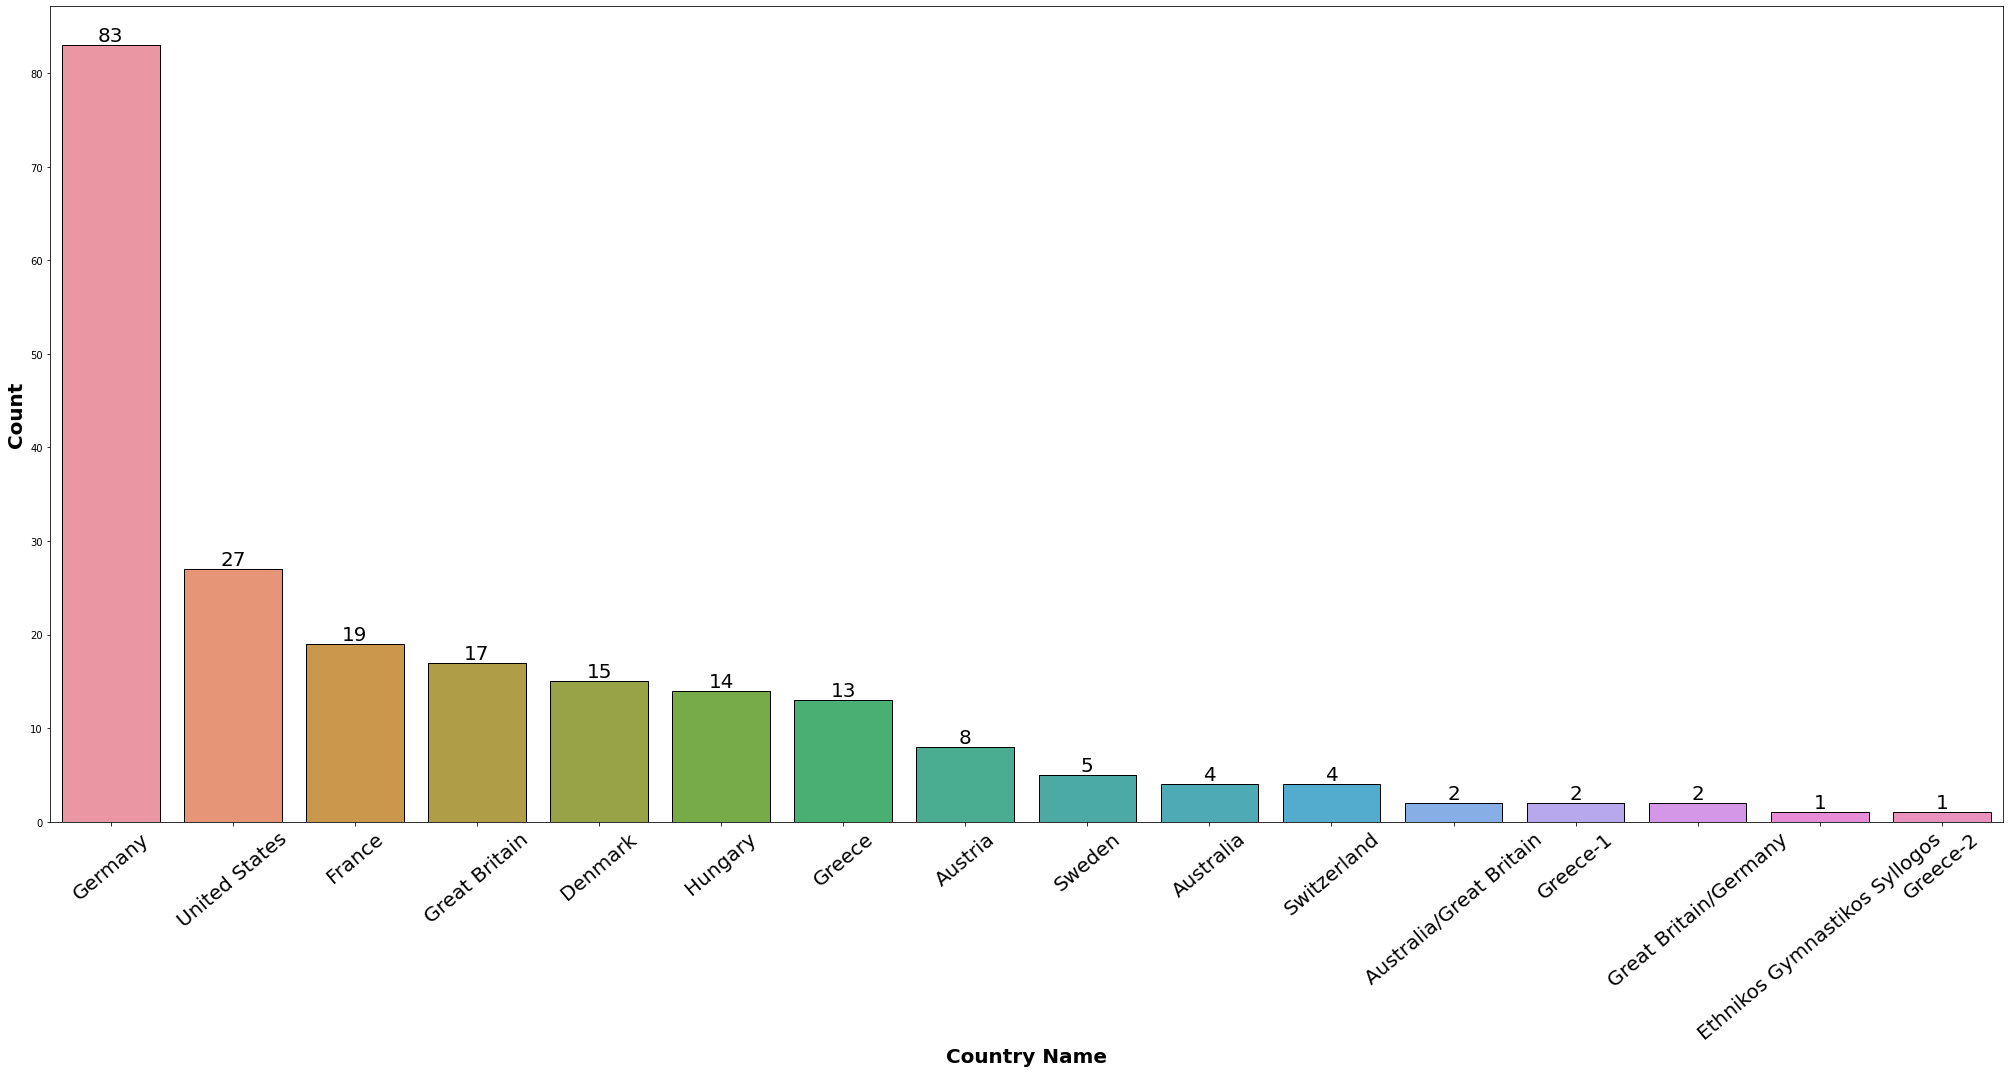

In [63]:
plt.figure(figsize=(35,15))
ax=sns.countplot(x='country',data=olympics_data,ec="black",order=data["country"].value_counts().index)
ax = ax.bar_label(ax.containers[0],fontsize=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("Country Name", weight="bold", fontsize=20)
plt.xticks(rotation = 40,fontsize=20)

### Observation:
- We found that oldest year is 1896
